In [15]:
import numpy as np
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras import layers

from tensorflow.keras import backend as K

from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [16]:
from tensorflow.python.client import device_lib
#tf.disable_v2_behavior()

#print(device_lib.list_local_devices())
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

print(tf.__version__ )

Num GPUs Available:  1
2.9.1


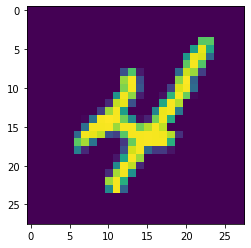

In [17]:
# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

# Load the data and split it between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

AssertionErrorx_train = np.expand_dims(x_train, -1)
x = x_train[9].reshape(1, 28,28,1)
plt.imshow(x[0])

(1, 28, 28, 1)
Input shape :  (None, 28, 28, 1)
k 4
PS :  (None, 4, 4, 1)
(1, 28, 28, 2)


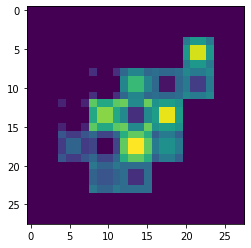

In [18]:
from sa_decomp_layer import SADecompLayer

# Test SADecpmp module
print(x.shape)

model = keras.Sequential([
    
    keras.Input(shape=input_shape),
    SADecompLayer(w_size=4, name='sad1_1'),
    #SADecompLayer(w_size=28, name='sad2_1'),

    ])
#model.summary()
# Call model on a test input
#model = keras.Model(input, ys, name="encoder")
#model.summary()

sym = model(x)
print(sym.shape)
#asym = x - sym
plt.imshow( sym[0,:,:,0]  )




BEFORE:



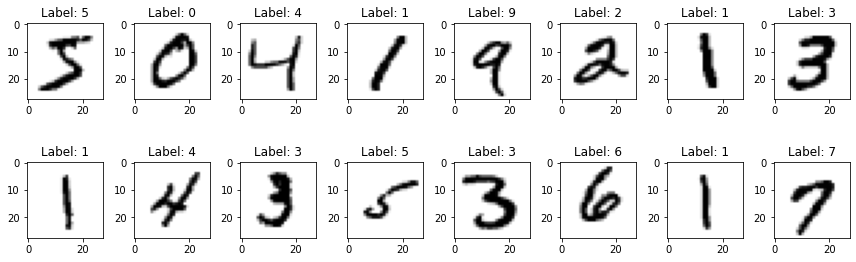

AFTER:



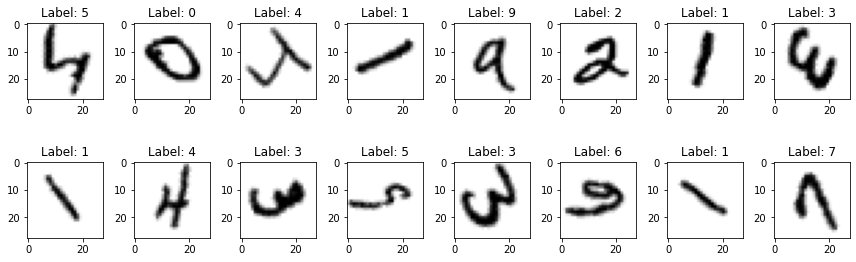

In [19]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# specify the maximum rotation_range angle
rotation_range_val = 180
# import relevant library
# create the class object
datagen = ImageDataGenerator(rotation_range=rotation_range_val)
# fit the generator
datagen.fit(x_train.reshape(x_train.shape[0], 28, 28, 1))
# define number of rows & columns
num_row = 2
num_col = 8
num = num_row*num_col
# plot before
print('BEFORE:\n')
# plot images
fig1, axes1 = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
for i in range(num):
     ax = axes1[i//num_col, i%num_col]
     ax.imshow(x_train[i], cmap='gray_r')
     ax.set_title('Label: {}'.format(y_train[i]))
plt.tight_layout()
plt.show()
# plot after
print('AFTER:\n')
fig2, axes2 = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
for X, Y in datagen.flow(x_train.reshape(x_train.shape[0], 28, 28, 1), y_train.reshape(y_train.shape[0], 1),batch_size=num,shuffle=False):
     for i in range(0, num):
          ax = axes2[i//num_col, i%num_col]
          ax.imshow(X[i].reshape(28,28), cmap='gray_r')
          ax.set_title('Label: {}'.format(int(Y[i])))
     break
plt.tight_layout()
plt.show()


In [94]:
def rotateDataset(x,y, maxRot = 360, h=28, w=28, batch_size=100):
    datagen = ImageDataGenerator(rotation_range=maxRot)
    # fit the generator
    datagen.fit(x.reshape(x.shape[0], 28, 28, 1))
    out = datagen.flow(x.reshape(x.shape[0], h, w, 1), y.reshape(y.shape[0], -1), batch_size=batch_size)


    return  out


In [21]:


# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [248]:
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        #SADecompLayer( w_size=3, name='sad0_1'),

        layers.Conv2D(32, kernel_size=(3, 3), padding='SAME', activation='relu'),
        layers.Conv2D(32, kernel_size=(3, 3), padding='SAME', activation='relu'),
        layers.Conv2D(32, kernel_size=(3, 3), padding='SAME', activation='relu'),
        layers.MaxPooling2D(pool_size=(2, 2)),        
        #SADecompLayer( w_size=3, name='sad1_1'),

        layers.Conv2D(64, kernel_size=(3, 3), padding='SAME', activation='relu'),
        layers.Conv2D(64, kernel_size=(3, 3), padding='SAME', activation='relu'),
        layers.Conv2D(64, kernel_size=(3, 3), padding='SAME', activation='relu'),
        layers.MaxPooling2D(pool_size=(2, 2)),
        SADecompLayer( w_size=3, name='sad2_1'),

        layers.Conv2D(128, kernel_size=(3, 3), padding='SAME', activation='relu'),
        layers.Conv2D(128, kernel_size=(3, 3), padding='SAME', activation='relu'),
        layers.Conv2D(128, kernel_size=(3, 3), padding='SAME', activation='relu'),
        layers.MaxPooling2D(pool_size=(2, 2)),

        layers.Flatten(),
        layers.Dropout(0.5),
        #layers.Dense(1200, activation='relu'),
        #layers.Dense(3200, activation='relu'),

        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()


Input shape :  (None, 7, 7, 64)
k 3
PS :  (None, 3, 3, 64)
Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_48 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 conv2d_49 (Conv2D)          (None, 28, 28, 32)        9248      
                                                                 
 conv2d_50 (Conv2D)          (None, 28, 28, 32)        9248      
                                                                 
 max_pooling2d_29 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_51 (Conv2D)          (None, 14, 14, 64)        18496     
                                                                 
 conv2d_52 (Conv2D)          (None, 14, 14, 64)        36928

In [249]:
batch_size = 128
epochs = 5
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(rotateDataset(x_test,y_test)))

Epoch 1/5
469/469 [==============================] - 20s 39ms/step - loss: 0.2096 - accuracy: 0.9325 - val_loss: 3.3104 - val_accuracy: 0.4173
Epoch 2/5
469/469 [==============================] - 18s 38ms/step - loss: 0.0549 - accuracy: 0.9834 - val_loss: 3.4107 - val_accuracy: 0.4065
Epoch 3/5
469/469 [==============================] - 19s 40ms/step - loss: 0.0392 - accuracy: 0.9883 - val_loss: 4.2939 - val_accuracy: 0.3979
Epoch 4/5
469/469 [==============================] - 17s 36ms/step - loss: 0.0306 - accuracy: 0.9909 - val_loss: 4.0836 - val_accuracy: 0.4405
Epoch 5/5
469/469 [==============================] - 17s 36ms/step - loss: 0.0261 - accuracy: 0.9922 - val_loss: 3.2575 - val_accuracy: 0.4477


In [250]:
#rotateDataset(x_test,y_test)
score = model.evaluate(rotateDataset(x_test,y_test), verbose=1)
print("Test loss:", score[0])
print("Test accuracy:", score[1])


100/100 [==============================] - 3s 30ms/step - loss: 3.2619 - accuracy: 0.4425
Test loss: 3.2618725299835205
Test accuracy: 0.4424999952316284


In [232]:
def get_cnn_out(input, layer_num):
    get_layer_output = K.function([model.input], [l.output for l in model.layers][layer_num])
    layer_out = np.array(get_layer_output(input))
    return layer_out[0]

1/1 [==============================] - 0s 24ms/step
5 5


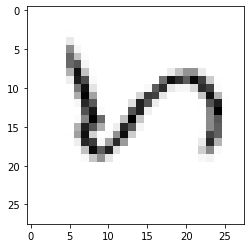

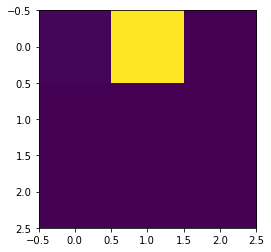

In [268]:
get_layer_output = K.function([model.input], model.layers[12].output)

for X,Y in rotateDataset(x_test,y_test, batch_size=1, maxRot=90):
    print(np.argmax(Y), np.argmax(model.predict(X)))
    plt.figure(0)  
    plt.imshow(X.reshape(28,28), cmap='gray_r')  
    plt.figure(1)  
    layer_out = np.array(get_layer_output([X]))

    plt.imshow(layer_out[0,:,:,0])   
    break

In [258]:
layer_out[0,:,:,0]

array([[0.        , 0.        , 0.10709465],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ]], dtype=float32)